In [1]:
import glob
import pandas as pd
import os
import json
import matplotlib.pyplot as plt
import re
import numpy as np
import seaborn as sns
import ast

In [2]:
os.getcwd()
data_path='data\\out\\predictive'
PATH=os.path.join(os.getcwd(), data_path)

In [3]:
def read_data_from_folder(folder_path):
    dfs = pd.DataFrame()
    file_count = 0  # counter for loaded files
    folder_path_add='\\singles'
    folder_path = folder_path + folder_path_add
    # Regex to extract the number after "participant_" and before ".csv"
    # This regex looks for "participant_" followed by one or more digits (\d+)
    # and captures these digits. It expects ".csv" at the end.
    participant_id_regex = re.compile(r'(?:model|participant)_(\d+)\.csv')


    for filename in os.listdir(folder_path):
        if filename.endswith('.csv'):
            file_path = os.path.join(folder_path, filename)
            df = pd.read_csv(file_path)

            # Extract model_id from filename using regex
            match = participant_id_regex.search(filename)
            if match:
                model_id = int(match.group(1)) # Convert the captured digits to an integer
                df['model_id'] = model_id # Add the model_id column
            else:
                # Handle cases where the filename doesn't match the expected format
                print(f"Warning: Could not extract model_id from filename: {filename}")
                df['model_id'] = None # Or some other indicator of missing ID

            dfs = pd.concat([dfs, df], ignore_index=True)
            file_count += 1  # increment counter

    print(f"{file_count} CSV file(s) loaded.")
    return dfs

In [4]:
def load_models(base_path="predictive"):
    """
    Load one CSV per model folder and create separate DataFrame variables
    named <model_name>_df in the global namespace.
    
    Parameters
    ----------
    base_path : str
        Path to the 'predictive' folder.
    """
    for model_name in os.listdir(base_path):
        model_path = os.path.join(base_path, model_name)
        #print(f"Loading model: {model_name} from {model_path}")
        
        if os.path.isdir(model_path):
            # Read data from the model folder
            df = read_data_from_folder(model_path)
            #if model name has - in its name make it underscore
            model_name = model_name.replace("-", "_")
            globals()[f"{model_name}_df"] = df
            print(f"Loaded {model_name}_df with shape {df.shape}")


In [5]:
load_models(base_path=PATH)

32 CSV file(s) loaded.
Loaded centaur_70B_df with shape (3200, 9)
32 CSV file(s) loaded.
Loaded centaur_70B_last_trial_df with shape (3200, 9)
32 CSV file(s) loaded.
Loaded centaur_70B_no_reward_without_rewards_df with shape (3200, 9)
32 CSV file(s) loaded.
Loaded centaur_70B_without_task_prompt_df with shape (3200, 9)
32 CSV file(s) loaded.
Loaded centaur_70B_without_task_prompt_without_rewards_df with shape (3200, 9)
32 CSV file(s) loaded.
Loaded centaur_70B_zero_shot_df with shape (3200, 9)
32 CSV file(s) loaded.
Loaded centaur_8B_df with shape (3200, 9)
32 CSV file(s) loaded.
Loaded centaur_8B_last_trial_df with shape (3200, 9)
32 CSV file(s) loaded.
Loaded centaur_8B_no_reward_without_rewards_df with shape (3200, 9)
32 CSV file(s) loaded.
Loaded centaur_8B_without_task_prompt_df with shape (3200, 9)
32 CSV file(s) loaded.
Loaded centaur_8B_without_task_prompt_without_rewards_df with shape (3200, 9)
32 CSV file(s) loaded.
Loaded centaur_8B_zero_shot_df with shape (3200, 9)
32 CSV f

In [6]:
def agreement_df(df):
    """
    Create a DataFrame with the agreement between model predictions and actual choices.
    
    Parameters
    ----------
    df : pd.DataFrame
        DataFrame containing model predictions and actual choices.
        
    Returns
    -------
    pd.DataFrame
        DataFrame with columns 'model_id', 'trial', 'model_choice', 'human_choice', 'agreement'.
    """
    trial_columns = 'trial' if 'trial' in df.columns else 'trial_num'
    agreement = df[['model_id', trial_columns, 'model_choice', 'human_choice']].copy()
    agreement['agreement'] = agreement['model_choice'] == agreement['human_choice']
    agreement = agreement[agreement['agreement'] == True]
    return agreement

In [7]:
centaur_8B_df_agreement = agreement_df(centaur_8B_df)

In [8]:
def calculate_log_likelihood_stats(df, column_name='log_likelihood'):
    """
    Calculates the mean and standard error of the mean (SEM)
    for the specified column in a DataFrame.

    Args:
        df (pd.DataFrame): The input DataFrame containing a
                           'log_likelihood' column.

    Returns:
        tuple: A tuple containing the mean log-likelihood and the SEM.
    """
    # Drop missing log-likelihoods (NaN)
    valid_ll = df[column_name].dropna()

    # Compute mean and SEM
    if not valid_ll.empty:
        mean_ll = valid_ll.mean()
        sem_ll = valid_ll.std(ddof=1) / np.sqrt(len(valid_ll))
        return mean_ll, sem_ll
    else:
        return None, None

In [9]:
mean_ll_centaur_8b, sem_ll_centaur_8b = calculate_log_likelihood_stats(centaur_8B_df)
mean_ll_centaur_8b_last_trial, sem_ll_centaur_8b_last_trial = calculate_log_likelihood_stats(centaur_8B_last_trial_df)
mean_ll_centaur_8b_without_task_prompt, sem_ll_centaur_8b_without_task_prompt = calculate_log_likelihood_stats(centaur_8B_without_task_prompt_df)
mean_ll_centaur_8b_zero_shot, sem_ll_centaur_8b_zero_shot = calculate_log_likelihood_stats(centaur_8B_zero_shot_df)
mean_ll_centaur_8b_without_task_prompt_no_rewards, sem_ll_centaur_8b_without_task_prompt_no_rewards = calculate_log_likelihood_stats(centaur_8B_without_task_prompt_without_rewards_df)
mean_ll_centaur_8b_no_rewards, sem_ll_centaur_8b_no_rewards = calculate_log_likelihood_stats(centaur_8B_no_reward_without_rewards_df)


In [10]:
mean_ll_centaur_70b, sem_ll_centaur_70b = calculate_log_likelihood_stats(centaur_70B_df)
mean_ll_centaur_70b_last_trial, sem_ll_centaur_70b_last_trial = calculate_log_likelihood_stats(centaur_70B_last_trial_df)
mean_ll_centaur_70b_without_task_prompt, sem_ll_centaur_70b_without_task_prompt = calculate_log_likelihood_stats(centaur_70B_without_task_prompt_df)
mean_ll_centaur_70b_zero_shot, sem_ll_centaur_70b_zero_shot = calculate_log_likelihood_stats(centaur_70B_zero_shot_df)
mean_ll_centaur_70b_without_task_prompt_no_rewards, sem_ll_centaur_70b_without_task_prompt_no_rewards = calculate_log_likelihood_stats(centaur_70B_without_task_prompt_without_rewards_df)  
mean_ll_centaur_70b_no_rewards, sem_ll_centaur_70b_no_rewards = calculate_log_likelihood_stats(centaur_70B_no_reward_without_rewards_df)

In [11]:
mean_ll_llama_70b, sem_ll_llama_70b=calculate_log_likelihood_stats(llama_70B_df)
mean_ll_llama_70b_partial, sem_ll_llama_70b_partial=calculate_log_likelihood_stats(llama_70B_partial_df)

In [12]:
os.getcwd()

'c:\\Users\\snamazova\\OneDrive - dfki.de\\Dokumente\\study\\centaur_eval_simulator\\reverse_learning\\partial_feedback'

In [13]:
rw_df=pd.read_csv('data/out/predictive/rw_only_alpha.csv')

In [14]:
rw_df.rename(columns={'loglik': 'log_likelihood'}, inplace=True)

In [15]:
mean_ll_rw, sem_ll_rw=calculate_log_likelihood_stats(rw_df)


In [16]:
with open(f'{PATH}/rw_model_metrics.json', 'r') as f:
    metrics_data_rw = json.load(f)


In [17]:
with open(f'{PATH}/repetetive_metrics.json', 'r') as f:
    metrics_data_repetetive = json.load(f)
mean_rw = metrics_data_rw.get('average_log_loss_per_trial', None)
mean_repetetive = metrics_data_repetetive.get('average_log_loss_per_trial', None)

In [18]:
sem_rw=mean_rw/np.sqrt(len(centaur_70B_df))
sem_repetetive=mean_repetetive/np.sqrt(len(centaur_70B_df))

In [19]:
def plot_loglikelihood_bars(mu_centaur=None, sd_centaur=None,
                             mu_centaurB=None, sd_centaurB=None,
                             mu_llama=None, sd_llama=None,
                             mu_llamaB=None, sd_llamaB=None,
                             mu_rw=None, sd_rw=None,
                             mu_rep=None, sd_rep=None,
                             variant_labels=None,
                             family_labels=None,
                             colors=None,
                             figsize=(12, 10),
                             families=None):
    """
    Flexible grouped bar plot for NLL means with different model families.
    
    Parameters
    ----------
    mu_centaur, sd_centaur : float
        Mean and standard error for Centaur 8B model
    mu_centaurB, sd_centaurB : float
        Mean and standard error for Centaur 70B model
    mu_llama, sd_llama : float, optional
        Mean and standard error for LLaMA 8B model
    mu_llamaB, sd_llamaB : float, optional
        Mean and standard error for LLaMA 70B model
    mu_rw, sd_rw : float, optional
        Mean and standard error for RW model
    mu_rep, sd_rep : float, optional
        Mean and standard error for Rep model
    variant_labels : list of str, optional
        Labels for each bar
    family_labels : list of str, optional
        Labels for each family group
    
     : list of str, optional
        Colors for each bar
    figsize : tuple, optional
        Figure size
    families : list of str, optional
        List of model families to include ('centaur', 'llama', 'rw', 'rep')
    """
    # Default families if not specified
    if families is None:
        families = []
        # Auto-detect which families are provided
        if mu_centaur is not None and sd_centaur is not None and mu_centaurB is not None and sd_centaurB is not None:
            families.append('centaur')
        if mu_llama is not None and sd_llama is not None and mu_llamaB is not None and sd_llamaB is not None:
            families.append('llama')
        if mu_rw is not None and sd_rw is not None:
            families.append('rw')
        if mu_rep is not None and sd_rep is not None:
            families.append('rep')

    # Default labels
    if variant_labels is None:
        variant_labels = ['Centaur 8B', 'Centaur 70B', 'LLaMA 8B', 'LLaMA 70B', 'RW', 'Rep']
    if family_labels is None:
        family_labels = ['Centaur', 'LLaMA 3.1', 'Domain-Specific\nModel']
    if colors is None:
        colors = ['#E69F00', '#D55E00', '#56B4E9', '#0072B2', '#CC79A7', '#CC79A7']

    # Collect means, errors, and labels based on specified families
    means, errs, used_labels = [], [], []
    family_slices = []
    current_idx = 0

    # Process Centaur family if included
    if 'centaur' in families:
        if mu_centaur is None or sd_centaur is None or mu_centaurB is None or sd_centaurB is None:
            raise ValueError("Centaur family requires mu_centaur, sd_centaur, mu_centaurB, and sd_centaurB")
        
        means += [-mu_centaur, -mu_centaurB]  # Invert NLLs for Centaur models
        errs += [sd_centaur, sd_centaurB]
        used_labels += variant_labels[0:2]
        family_slices.append((current_idx, current_idx + 1))
        current_idx += 2

    # Process LLaMA family if included
    if 'llama' in families:
        if mu_llama is None or sd_llama is None or mu_llamaB is None or sd_llamaB is None:
            raise ValueError("LLaMA family requires mu_llama, sd_llama, mu_llamaB, and sd_llamaB")
        
        means += [mu_llama, mu_llamaB]  # Note: not inverted by default
        errs += [sd_llama, sd_llamaB]
        used_labels += variant_labels[2:4]
        family_slices.append((current_idx, current_idx + 1))
        current_idx += 2

    # Process RW model if included
    if 'rw' in families:
        if mu_rw is None or sd_rw is None:
            raise ValueError("RW family requires mu_rw and sd_rw")
            
        means.append(mu_rw)
        errs.append(sd_rw)
        used_labels.append(variant_labels[4])
        family_slices.append(current_idx)
        current_idx += 1

    # Process Rep model if included
    if 'rep' in families:
        if mu_rep is None or sd_rep is None:
            raise ValueError("Rep family requires mu_rep and sd_rep")
            
        means.append(mu_rep)
        errs.append(sd_rep)
        used_labels.append(variant_labels[5])
        family_slices.append(current_idx)
        current_idx += 1

    # Ensure we have at least one model to plot
    if not means:
        raise ValueError("No valid model families specified. Please provide at least one complete family.")

    # Bar positioning
    w = 0.5
    gap_in = 0
    gap_out = 0.1

    xpos = [0]
    for i in range(1, len(means)):
        # Determine if this is a new family group
        new_family = False
        #print(family_slices)
        for fslice in family_slices:
            if isinstance(fslice, tuple):  
        # Each tuple defines a family range → start new family at its start
                    if i == fslice[0]:
                        new_family = True
                        print("New family at index", i)
                        break
            elif i == fslice:  # Single index families (e.g., RW, Rep)
                new_family = True
                print("New family at index", i)
                break
        
        if new_family:
            xpos.append(xpos[-1] + w + gap_out)
        else:
            xpos.append(xpos[-1] + w + gap_in)
            
    xpos = np.array(xpos)

    # Plot
    fig, ax = plt.subplots(figsize=figsize)

    if len(colors) < len(means):
        colors += ['#CC79A7'] * (len(means) - len(colors))

    bars = ax.bar(xpos, means, w, yerr=errs, capsize=5,
                  color=colors[:len(means)], edgecolor='black', linewidth=0.3)

    # Annotate
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.4f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    # Chance line
    chance_nll = -np.log(0.5)
    ax.axhline(chance_nll, ls='--', c='grey', lw=1.2)
    adjustment_term=figsize[0]*0.04
    ax.text(xpos[-1]-adjustment_term, chance_nll, 'Random guessing',
            va='bottom', ha='left')

    # X-axis
    ax.set_xticks(xpos)
    size=20*(figsize[0]/6)*0.65
    ax.set_xticklabels(used_labels, ha='center',fontsize=size)

    # Add family labels as secondary x-axis
    family_centers = [
        (xpos[fslice[0]] + xpos[fslice[1]])/2 if isinstance(fslice, tuple) else xpos[fslice]
        for fslice in family_slices
    ]

    ax2 = ax.secondary_xaxis('bottom')
    ax2.set_xticks(family_centers)
    ax2.set_xticklabels(family_labels[:len(family_centers)])
    ax2.spines['bottom'].set_visible(False)  # optional: hide duplicate spine
    ax2.xaxis.set_label_position('bottom')
    pad_value = figsize[1] * 4  # multiplier can be adjusted
    ax2.tick_params(axis='x', pad=pad_value, length=0)



    # Group dividers
    for i in range(len(family_slices) - 1):
        fslice = family_slices[i]
        if isinstance(fslice, tuple):
            _, i1 = fslice
            divider_pos = xpos[i1] + w/2 + gap_out/2
        else:
            divider_pos = xpos[fslice] + w/2 + gap_out/2
        ax.axvline(divider_pos, color='grey', lw=1)

    ax.set_ylabel('Negative Log-Likelihood (NLL)',labelpad=20)
# Move label slightly to the left of the axis and below y=0
    ax.yaxis.set_label_coords(-0.12,0.4)  # (x, y) in axis coordinates

    ax.spines[['top','right','left','bottom']].set_visible(True)
    ax.grid(False)
    ax.margins(x=0.04)
    plt.tight_layout()
    return fig

In [20]:
mean_ll_llama_70b_partial

-0.5821109008789063

In [21]:
def set_dynamic_fontsize(fig_width=12, base_font=20):
    scale = fig_width / 6  # 6 is your baseline width, adjust as needed
    plt.rcParams.update({
        'font.size': base_font * scale * 0.65,
        'axes.titlesize': base_font * scale * 1.2,
        'axes.labelsize': base_font * scale * 0.9,
        'xtick.labelsize': base_font * scale * 0.9,
        'ytick.labelsize': base_font * scale * 0.9,
        'legend.fontsize': base_font * scale,
    })

In [22]:
colors_grouped=colors = ['#D55E00','#E69F00', '#0072B2','#56B4E9',  "#F783C3"]

In [23]:
set_dynamic_fontsize(fig_width=16)

New family at index 2
New family at index 4


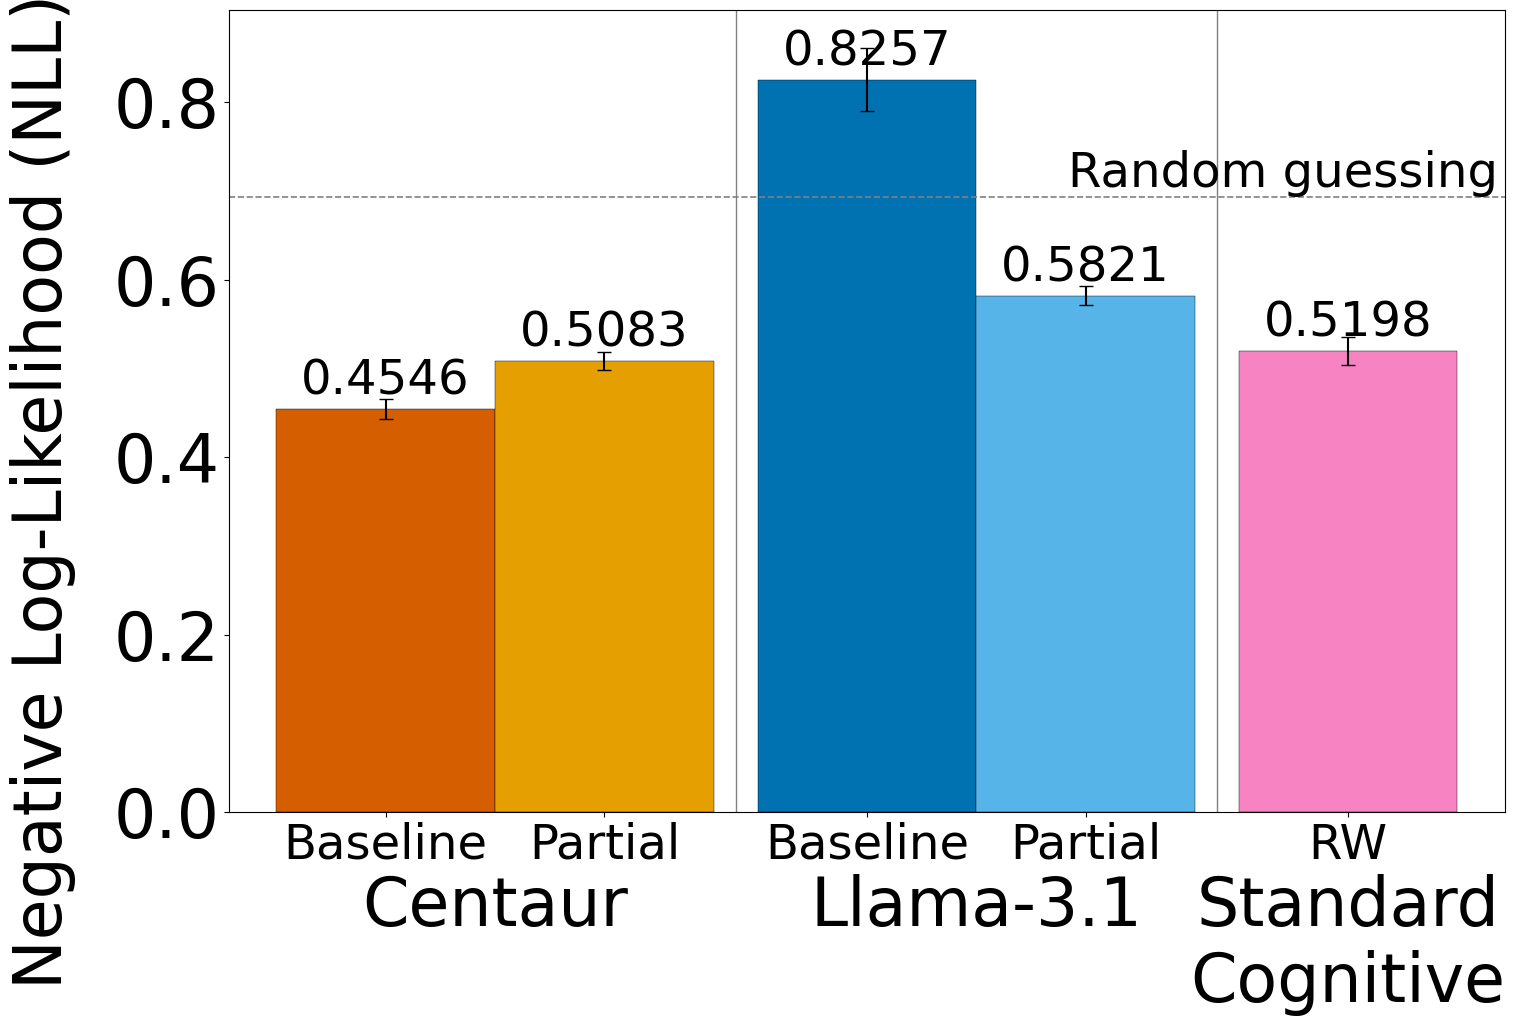

In [24]:
# Without repetitive model
fig = plot_loglikelihood_bars(
    mu_centaur=mean_ll_centaur_70b, sd_centaur=sem_ll_centaur_70b,
    mu_centaurB=mean_ll_centaur_70b_no_rewards, sd_centaurB=sem_ll_centaur_70b_no_rewards,
    mu_llama=-mean_ll_llama_70b, sd_llama=sem_ll_llama_70b,
    mu_llamaB=-mean_ll_llama_70b_partial, sd_llamaB=sem_ll_llama_70b_partial,
    mu_rw=-mean_ll_rw, sd_rw=sem_ll_rw,
    variant_labels=['Baseline','Partial','Baseline','Partial','RW','RW'],  # Need to provide all 6 labels even if some aren't used
    family_labels=['Centaur','Llama-3.1','Standard\nCognitive'],
    families=['centaur','llama','rw'],  # Explicitly specify which families to include
    figsize=(16,11.1),
    colors=colors_grouped
)

In [25]:
mean_ll_base=centaur_70B_df.groupby('model_id')['log_likelihood'].mean()
mean_ll_partial_information=centaur_70B_no_reward_without_rewards_df.groupby('model_id')['log_likelihood'].mean()

In [26]:
from scipy.stats import ttest_rel

t_stat, p_value = ttest_rel(mean_ll_base, mean_ll_partial_information)
print(f"t = {t_stat:.2f}, p = {p_value:.4f}")


t = 8.71, p = 0.0000


In [27]:
diff = mean_ll_base - mean_ll_partial_information
cohen_d = diff.mean() / diff.std(ddof=1)
print(f"Cohen's d = {cohen_d:.2f}")


Cohen's d = 1.54


In [30]:
mean_ll_partial_trial = centaur_70B_no_reward_without_rewards_df.groupby('trial_num')['log_likelihood'].mean()
t_stat, p_value = ttest_rel(mean_ll_base_trial, mean_ll_partial_trial)
print(f"t = {t_stat:.2f}, p = {p_value:.4f}")

t = 5.27, p = 0.0000


In [31]:
cohen_d = (mean_ll_base_trial - mean_ll_partial_trial).mean() / (mean_ll_base_trial - mean_ll_partial_trial).std(ddof=1)
print(f"Cohen's d = {cohen_d:.2f}")

Cohen's d = 0.53


In [32]:
mean_ll_centaur_70b_without_task_prompt_no_rewards

-0.5196933746337891

In [33]:
mean_ll_centaur_70b_last_trial

-0.519744873046875

In [35]:
def extract_probs(top2_tokens):
    prob_u = prob_p = None
    for entry in top2_tokens:
        if entry['token'] == 'U':
            prob_u = entry['prob']
        elif entry['token'] == 'P':
            prob_p = entry['prob']
    return pd.Series({'token_U_prob': prob_u, 'token_P_prob': prob_p})

In [36]:
centaur_70B_df['top2_tokens']=centaur_70B_df['top2_tokens'].apply(ast.literal_eval)

In [37]:
centaur_70B_no_reward_without_rewards_df['top2_tokens']=centaur_70B_no_reward_without_rewards_df['top2_tokens'].apply(ast.literal_eval)

In [38]:
centaur_70B_last_trial_df['top2_tokens']=centaur_70B_last_trial_df['top2_tokens'].apply(ast.literal_eval)
centaur_70B_without_task_prompt_df['top2_tokens']=centaur_70B_without_task_prompt_df['top2_tokens'].apply(ast.literal_eval)
centaur_70B_without_task_prompt_without_rewards_df['top2_tokens']=centaur_70B_without_task_prompt_without_rewards_df['top2_tokens'].apply(ast.literal_eval)
centaur_70B_zero_shot_df['top2_tokens']=centaur_70B_zero_shot_df['top2_tokens'].apply(ast.literal_eval)

In [39]:
centaur_8B_df['top2_tokens']=centaur_8B_df['top2_tokens'].apply(ast.literal_eval)
centaur_8B_last_trial_df['top2_tokens']=centaur_8B_last_trial_df['top2_tokens'].apply(ast.literal_eval)
centaur_8B_without_task_prompt_df['top2_tokens']=centaur_8B_without_task_prompt_df['top2_tokens'].apply(ast.literal_eval)
centaur_8B_without_task_prompt_without_rewards_df['top2_tokens']=centaur_8B_without_task_prompt_without_rewards_df['top2_tokens'].apply(ast.literal_eval)
centaur_8B_zero_shot_df['top2_tokens']=centaur_8B_zero_shot_df['top2_tokens'].apply(ast.literal_eval)

In [40]:
centaur_70B_df[['token_U_prob', 'token_P_prob']] = centaur_70B_df['top2_tokens'].apply(extract_probs)
centaur_70B_zero_shot_df[['token_U_prob', 'token_P_prob']] = centaur_70B_zero_shot_df['top2_tokens'].apply(extract_probs)
centaur_70B_without_task_prompt_df[['token_U_prob', 'token_P_prob']] = centaur_70B_without_task_prompt_df['top2_tokens'].apply(extract_probs)
centaur_70B_without_task_prompt_without_rewards_df[['token_U_prob', 'token_P_prob']] = centaur_70B_without_task_prompt_without_rewards_df['top2_tokens'].apply(extract_probs)
centaur_70B_last_trial_df[['token_U_prob', 'token_P_prob']] = centaur_70B_last_trial_df['top2_tokens'].apply(extract_probs)

In [41]:
centaur_70B_no_reward_without_rewards_df[['token_U_prob', 'token_P_prob']] = centaur_70B_no_reward_without_rewards_df['top2_tokens'].apply(extract_probs)

In [42]:
llama_70B_df['top2_tokens']=llama_70B_df['top2_tokens'].apply(ast.literal_eval)
llama_70B_df[['token_U_prob', 'token_P_prob']] = llama_70B_df['top2_tokens'].apply(extract_probs)

In [43]:
llama_70B_partial_df['top2_tokens']=llama_70B_partial_df['top2_tokens'].apply(ast.literal_eval)
llama_70B_partial_df[['token_U_prob', 'token_P_prob']] = llama_70B_partial_df['top2_tokens'].apply(extract_probs)

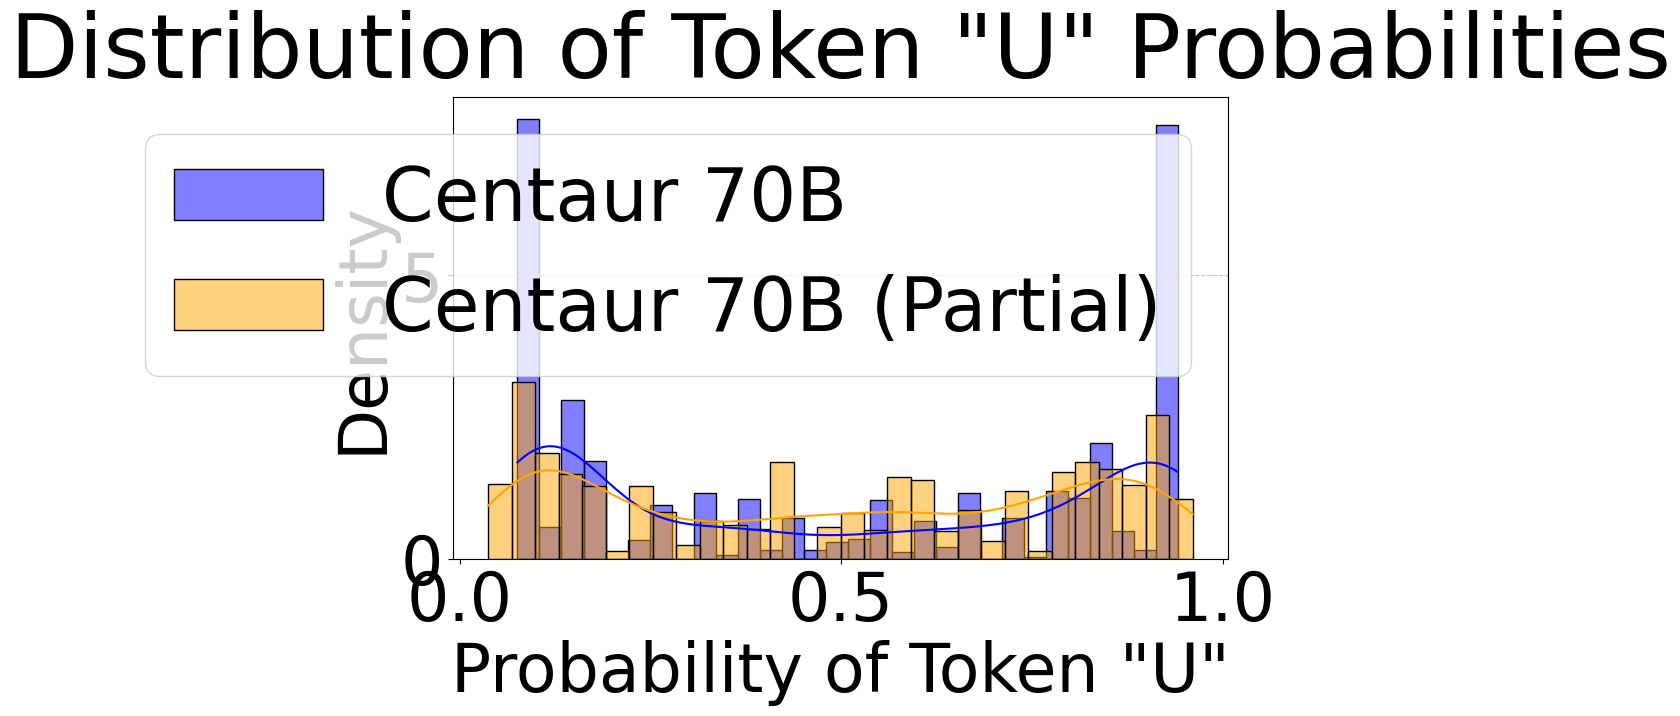

In [46]:
plt.figure(figsize=(10, 6))

# Plot distribution for Llama 70B
sns.histplot(centaur_70B_df['token_U_prob'], bins=30, kde=True, color='blue', label='Centaur 70B', stat='density')

# Plot distribution for Centaur 70B
sns.histplot(centaur_70B_no_reward_without_rewards_df['token_U_prob'], bins=30, kde=True, color='orange', label='Centaur 70B (Partial)', stat='density')

plt.title('Distribution of Token "U" Probabilities')
plt.xlabel('Probability of Token "U"')
plt.ylabel('Density')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

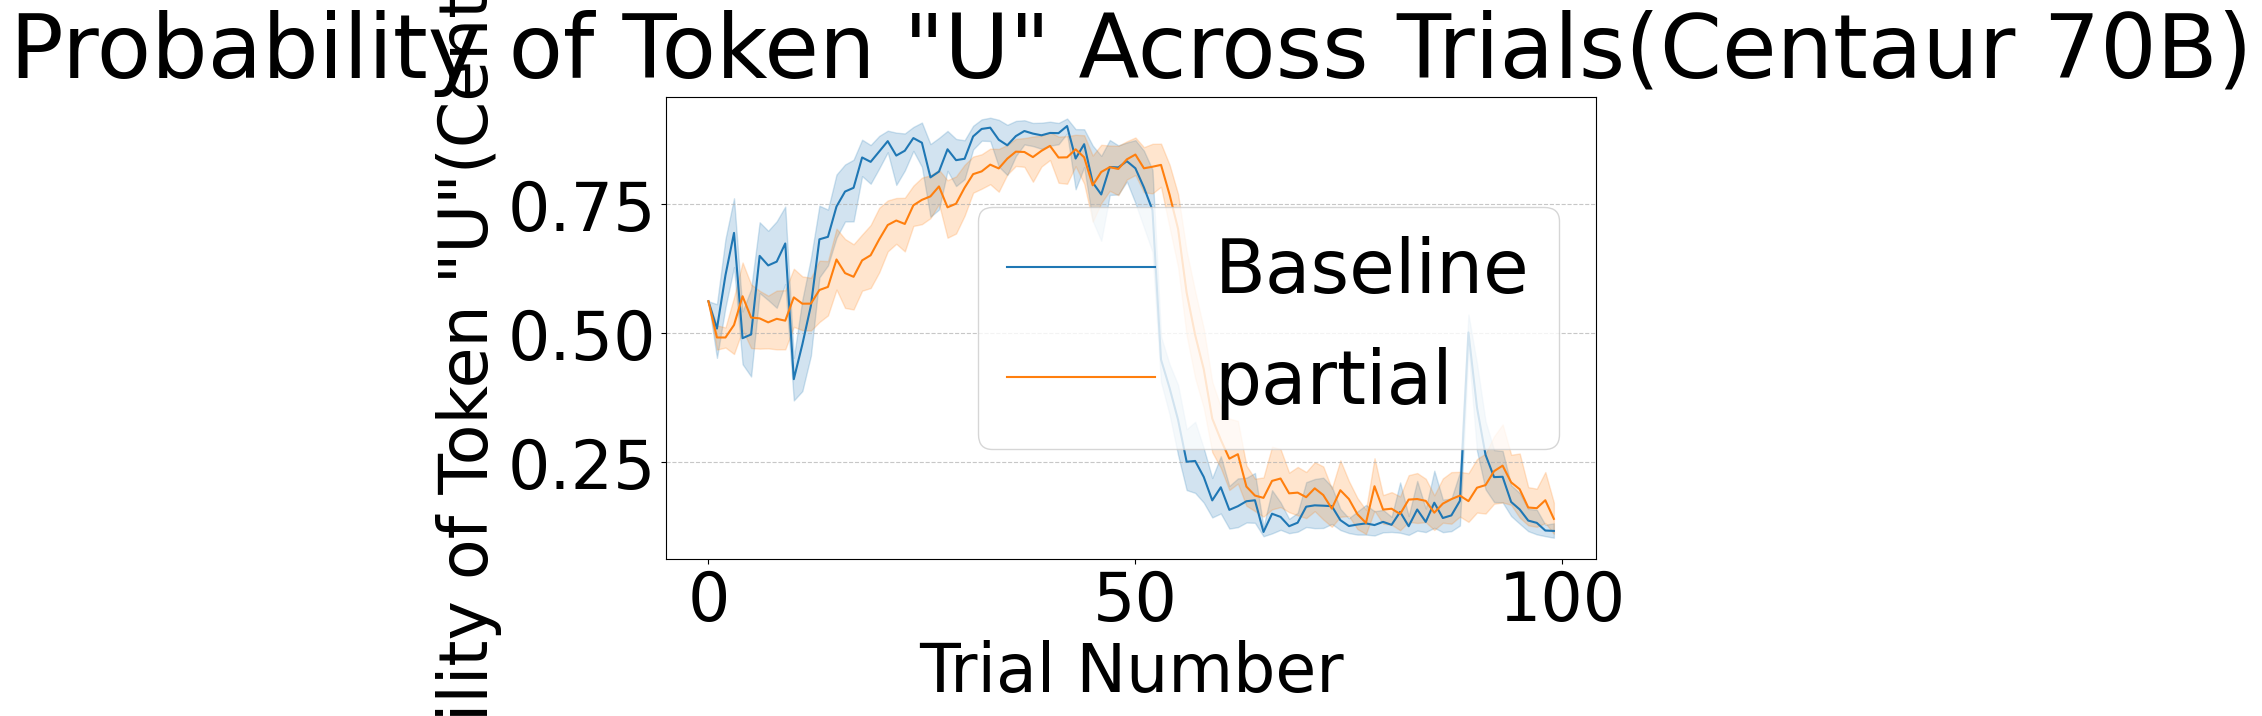

In [47]:
plt.figure(figsize=(12, 6))

# Plot probability of 'U' across trials for Llama 70B
sns.lineplot(data=centaur_70B_df, x='trial_num', y='token_U_prob', label='Baseline')

# Plot probability of 'U' across trials for Centaur 70B
sns.lineplot(data=centaur_70B_no_reward_without_rewards_df, x='trial_num', y='token_U_prob', label='partial')

plt.title('Probability of Token "U" Across Trials(Centaur 70B)')
plt.xlabel('Trial Number')
plt.ylabel('Probability of Token "U"(Centaur 70B)')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

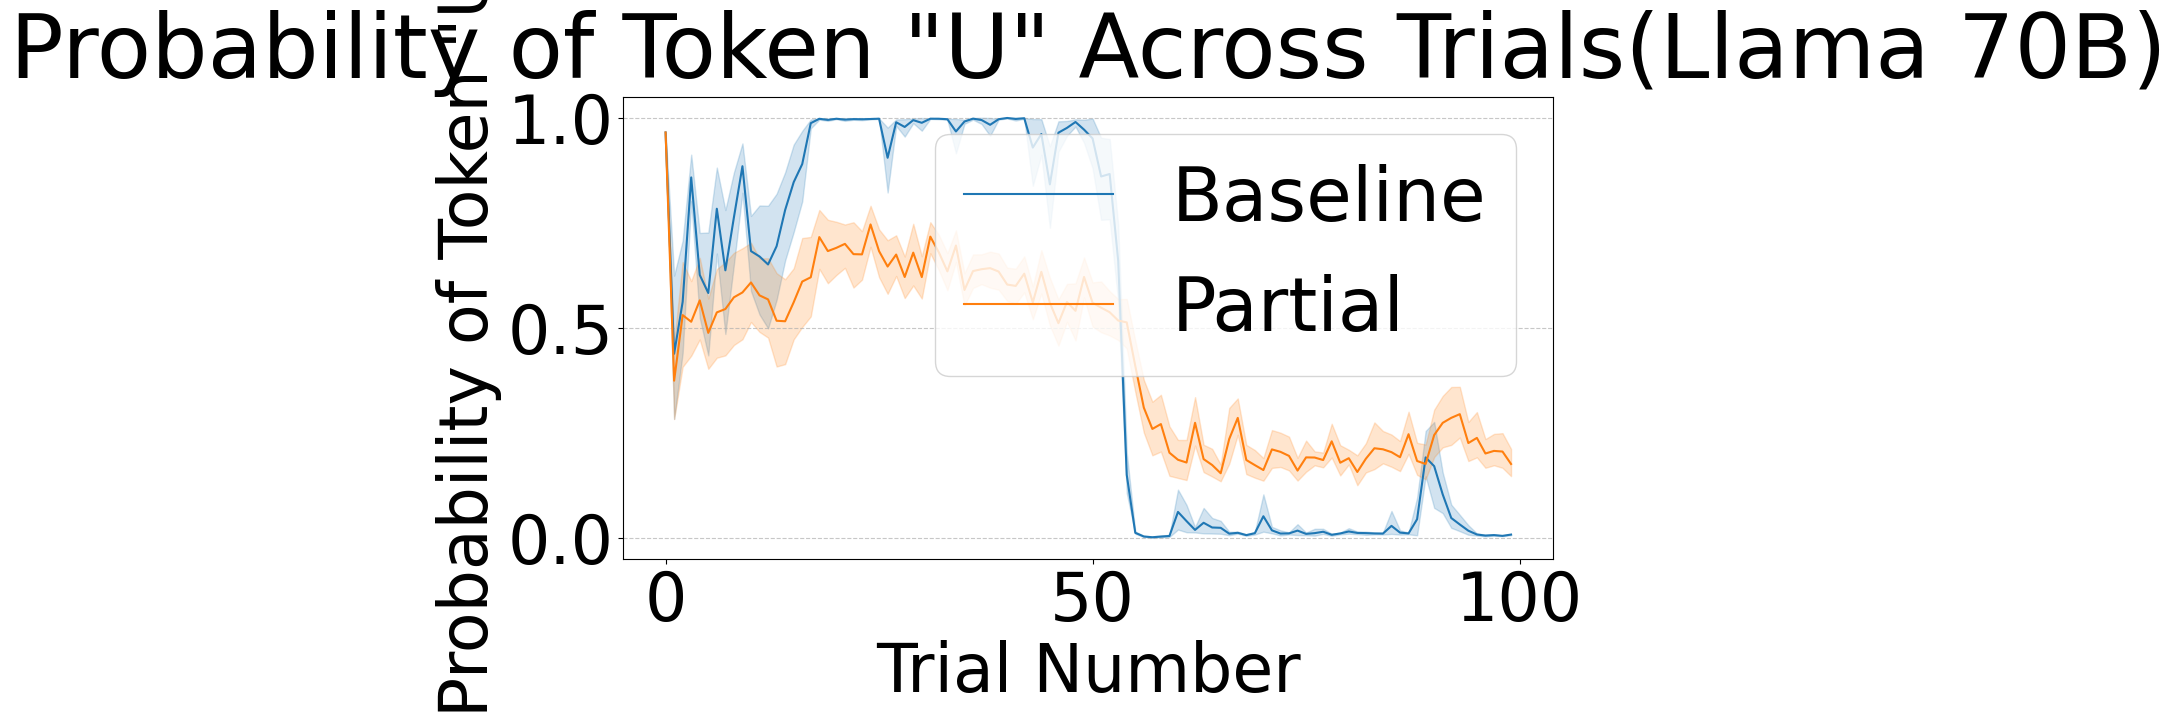

In [48]:
plt.figure(figsize=(12, 6))

# Plot probability of 'U' across trials for Llama 70B
sns.lineplot(data=llama_70B_df, x='trial_num', y='token_U_prob', label='Baseline')

# Plot probability of 'U' across trials for Centaur 70B
sns.lineplot(data=llama_70B_partial_df, x='trial_num', y='token_U_prob', label='Partial')

plt.title('Probability of Token "U" Across Trials(Llama 70B)')
plt.xlabel('Trial Number')
plt.ylabel('Probability of Token "U"')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()